In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, r2_score, classification_report)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset=pd.read_csv("Mental Health Dataset.csv")
original_ds=dataset.copy()

In [ ]:
dataset.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
dataset.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
206412,8/27/2014 14:03,Male,Australia,Housewife,Yes,Yes,Yes,1-14 days,No,Yes,No,Medium,No,Maybe,No,No,Not sure
206413,8/27/2014 14:10,Male,Canada,Housewife,No,No,No,1-14 days,No,Yes,No,Medium,No,Maybe,No,No,Not sure
206414,8/27/2014 14:11,Male,United Kingdom,Housewife,No,Yes,Yes,1-14 days,No,Yes,No,Medium,No,Maybe,No,Yes,No
206415,8/27/2014 14:11,Male,United States,Housewife,No,No,No,1-14 days,No,Yes,No,Medium,No,Maybe,No,No,Not sure
206416,8/27/2014 14:13,Male,Switzerland,Hous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns=dataset.columns

In [ ]:
len(columns)

17

In [ ]:
gender=dataset['Gender']
gender_categories=gender.unique()
gender_counts = dataset['Gender'].value_counts()

self_employed=dataset['self_employed']
self_employed_categories=gender.unique()
self_employed_counts = dataset['self_employed'].value_counts()

family_history=dataset['family_history']
family_history_categories=gender.unique()
family_history_counts = dataset['family_history'].value_counts()

mental_health_interview=dataset['mental_health_interview']
mental_health_interview_categories=gender.unique()
mental_health_interview_counts = dataset['mental_health_interview'].value_counts()


care_options=dataset['care_options']
care_options_categories=care_options.unique()
care_options_counts = dataset['care_options'].value_counts()

In [ ]:
pie_plot = {
    'Gender': gender_counts,
    'Self-Employed': self_employed_counts,
    'Family History': family_history_counts,
    'Mental Health Interview': mental_health_interview_counts,
    "Care Options":care_options_counts
}

In [ ]:
female_data = dataset[dataset['Gender'] == 'Female']
female_data['Occupation'].value_counts()

,count
Occupation,
Student,11979
Housewife,11616
Others,10406
Business,9559
Corporate,8954


In [ ]:
male_data = dataset[dataset['Gender'] == 'Male']
male_data['Occupation'].value_counts()

,count
Occupation,
Others,13721
Corporate,12915
Housewife,11685
Student,9840
Business,6765


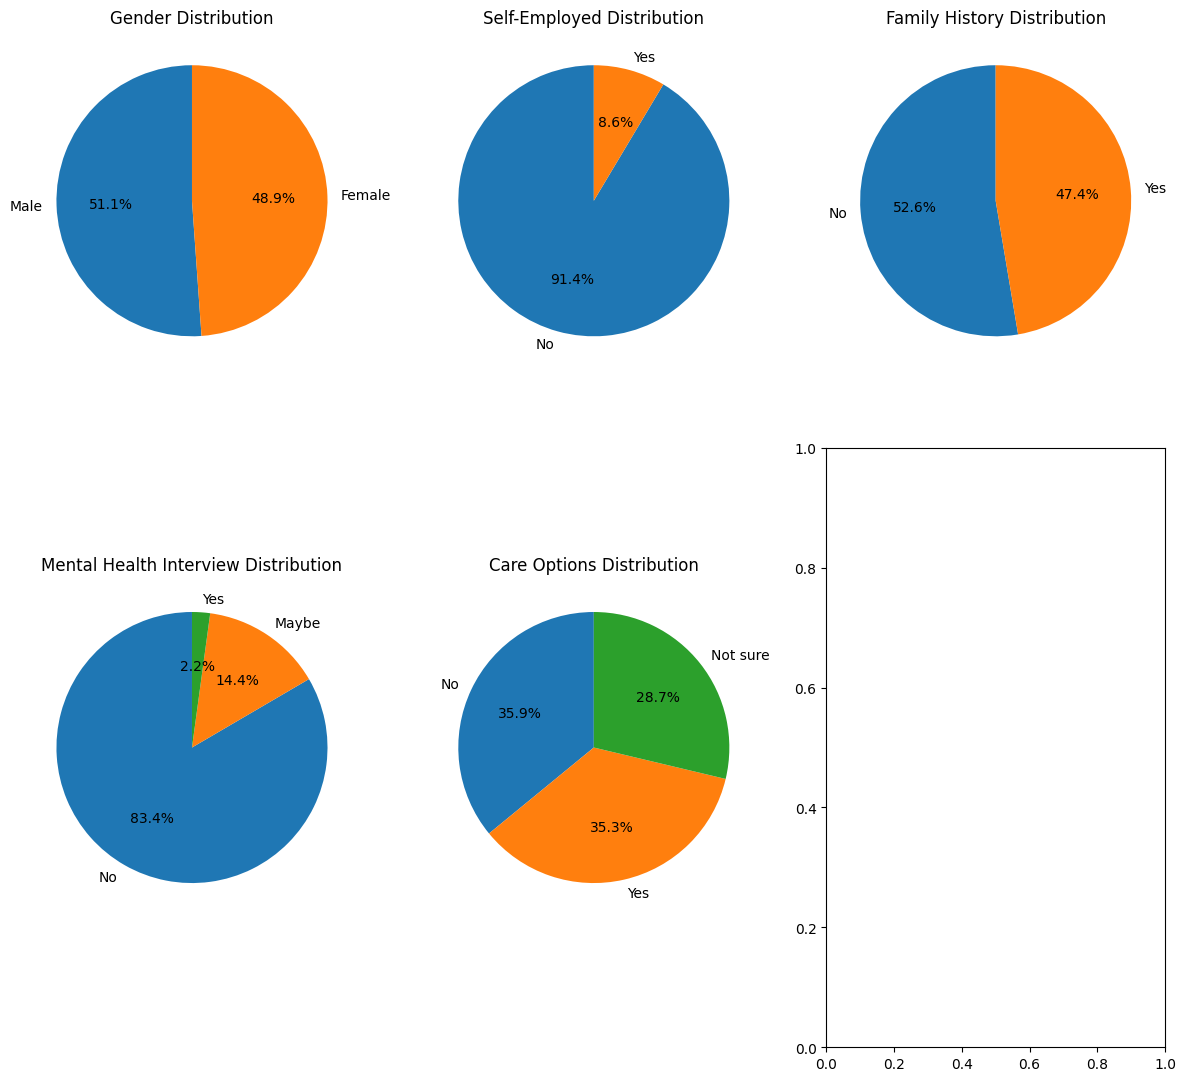

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, (key, value) in enumerate(pie_plot.items()):
    axes[i].pie(value, labels=value.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{key} Distribution')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

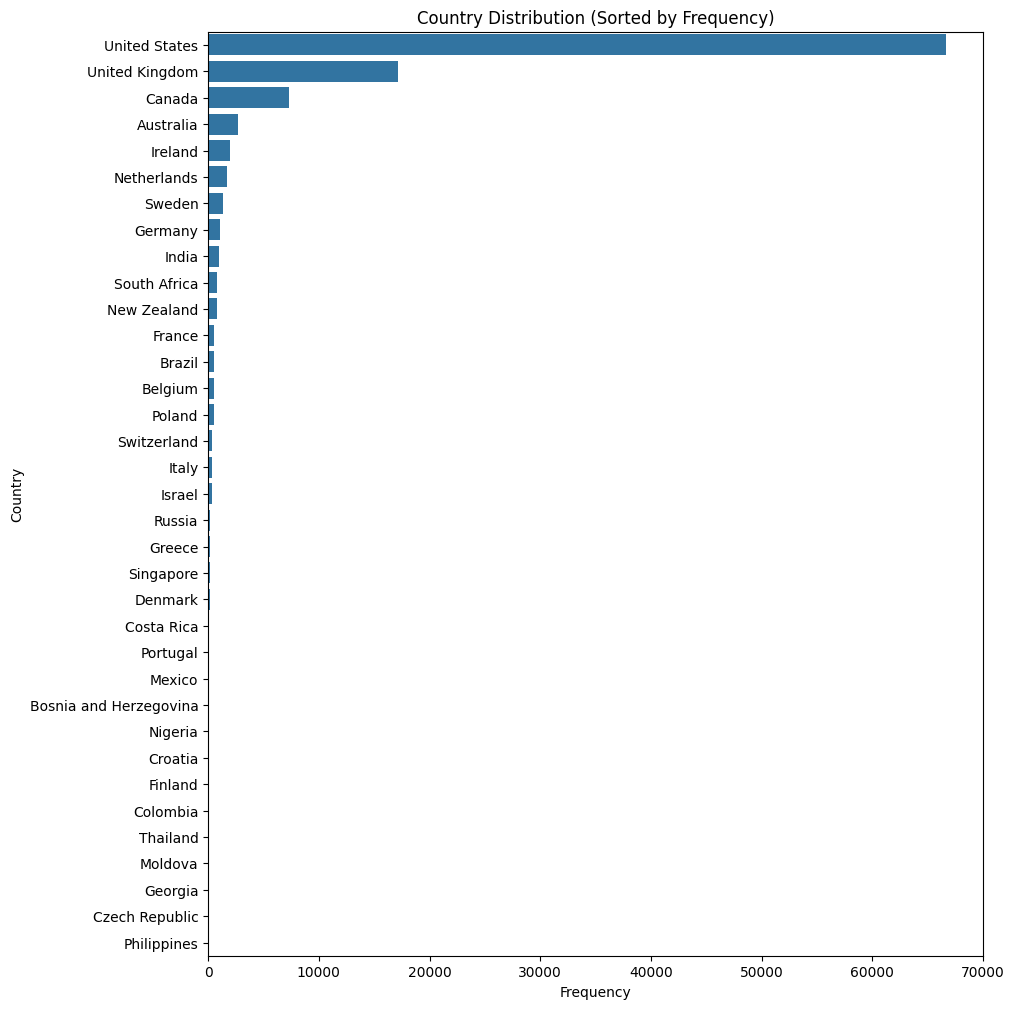

In [ ]:
country_counts = dataset['Country'].value_counts()

# Sort the countries by frequency in descending order
sorted_countries = country_counts.sort_values(ascending=False).index

# Create the horizontal bar plot using seaborn
plt.figure(figsize=(10, 12))  # Adjust figure size if needed
sns.countplot(y='Country', data=dataset, order=sorted_countries)
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.title("Country Distribution (Sorted by Frequency)")
plt.show()

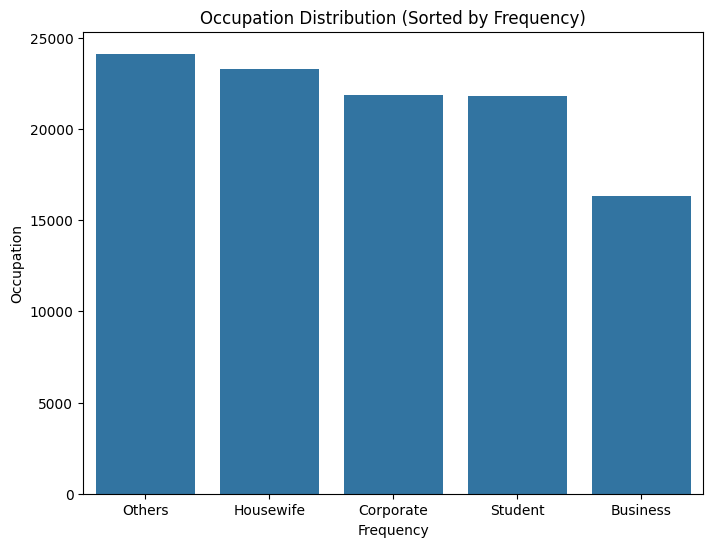

In [ ]:
occupation_counts = dataset['Occupation'].value_counts()

# Sort the occupation by frequency in descending order
sorted_occupation = occupation_counts.sort_values(ascending=False).index

# Create the horizontal bar plot using seaborn
plt.figure(figsize=(8,6))  # Adjust figure size if needed
sns.countplot(x='Occupation', data=dataset, order=sorted_occupation)
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.title("Occupation Distribution (Sorted by Frequency)")
plt.show()

# **Summary of Categorical Features**

# ***Key Observations:***

1. ***Geographic Distribution***: The United States has the highest frequency of
reported depression cases in the dataset. This suggests a potential need for further investigation into factors contributing to mental health concerns in this region.

2. ***Gender Disparity:*** Males constitute a larger proportion of individuals reporting depression compared to females. This highlights a significant gender difference in reported mental health experiences.

3. ***Occupation and Gender:*** Among males reporting depression, the most frequent occupation is "corporate," followed by "student." For females reporting depression, the most frequent occupation is "student." These findings indicate potential occupation-related stressors and their varying impacts on mental health across genders.

4. ***Employment Status:*** The majority of individuals reporting depression are not self-employed, indicating that traditional employment settings may be associated with higher rates of reported mental health concerns.

5. ***Family History:*** A significant number of cases report not having a family history of mental health issues, emphasizing the growing spread of depression.

In [ ]:
numerical_features = ['Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

descriptive_stats = dataset[numerical_features].describe()
descriptive_stats

,Days_Indoors,Growing_Stress,Changes_Habits,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,292364,292364,292364,292364,292364,292364,292364
unique,5,3,3,3,2,3,3
top,1-14 days,Maybe,Yes,Medium,No,No,Maybe
freq,63548,99985,109523,101064,154328,105843,103393


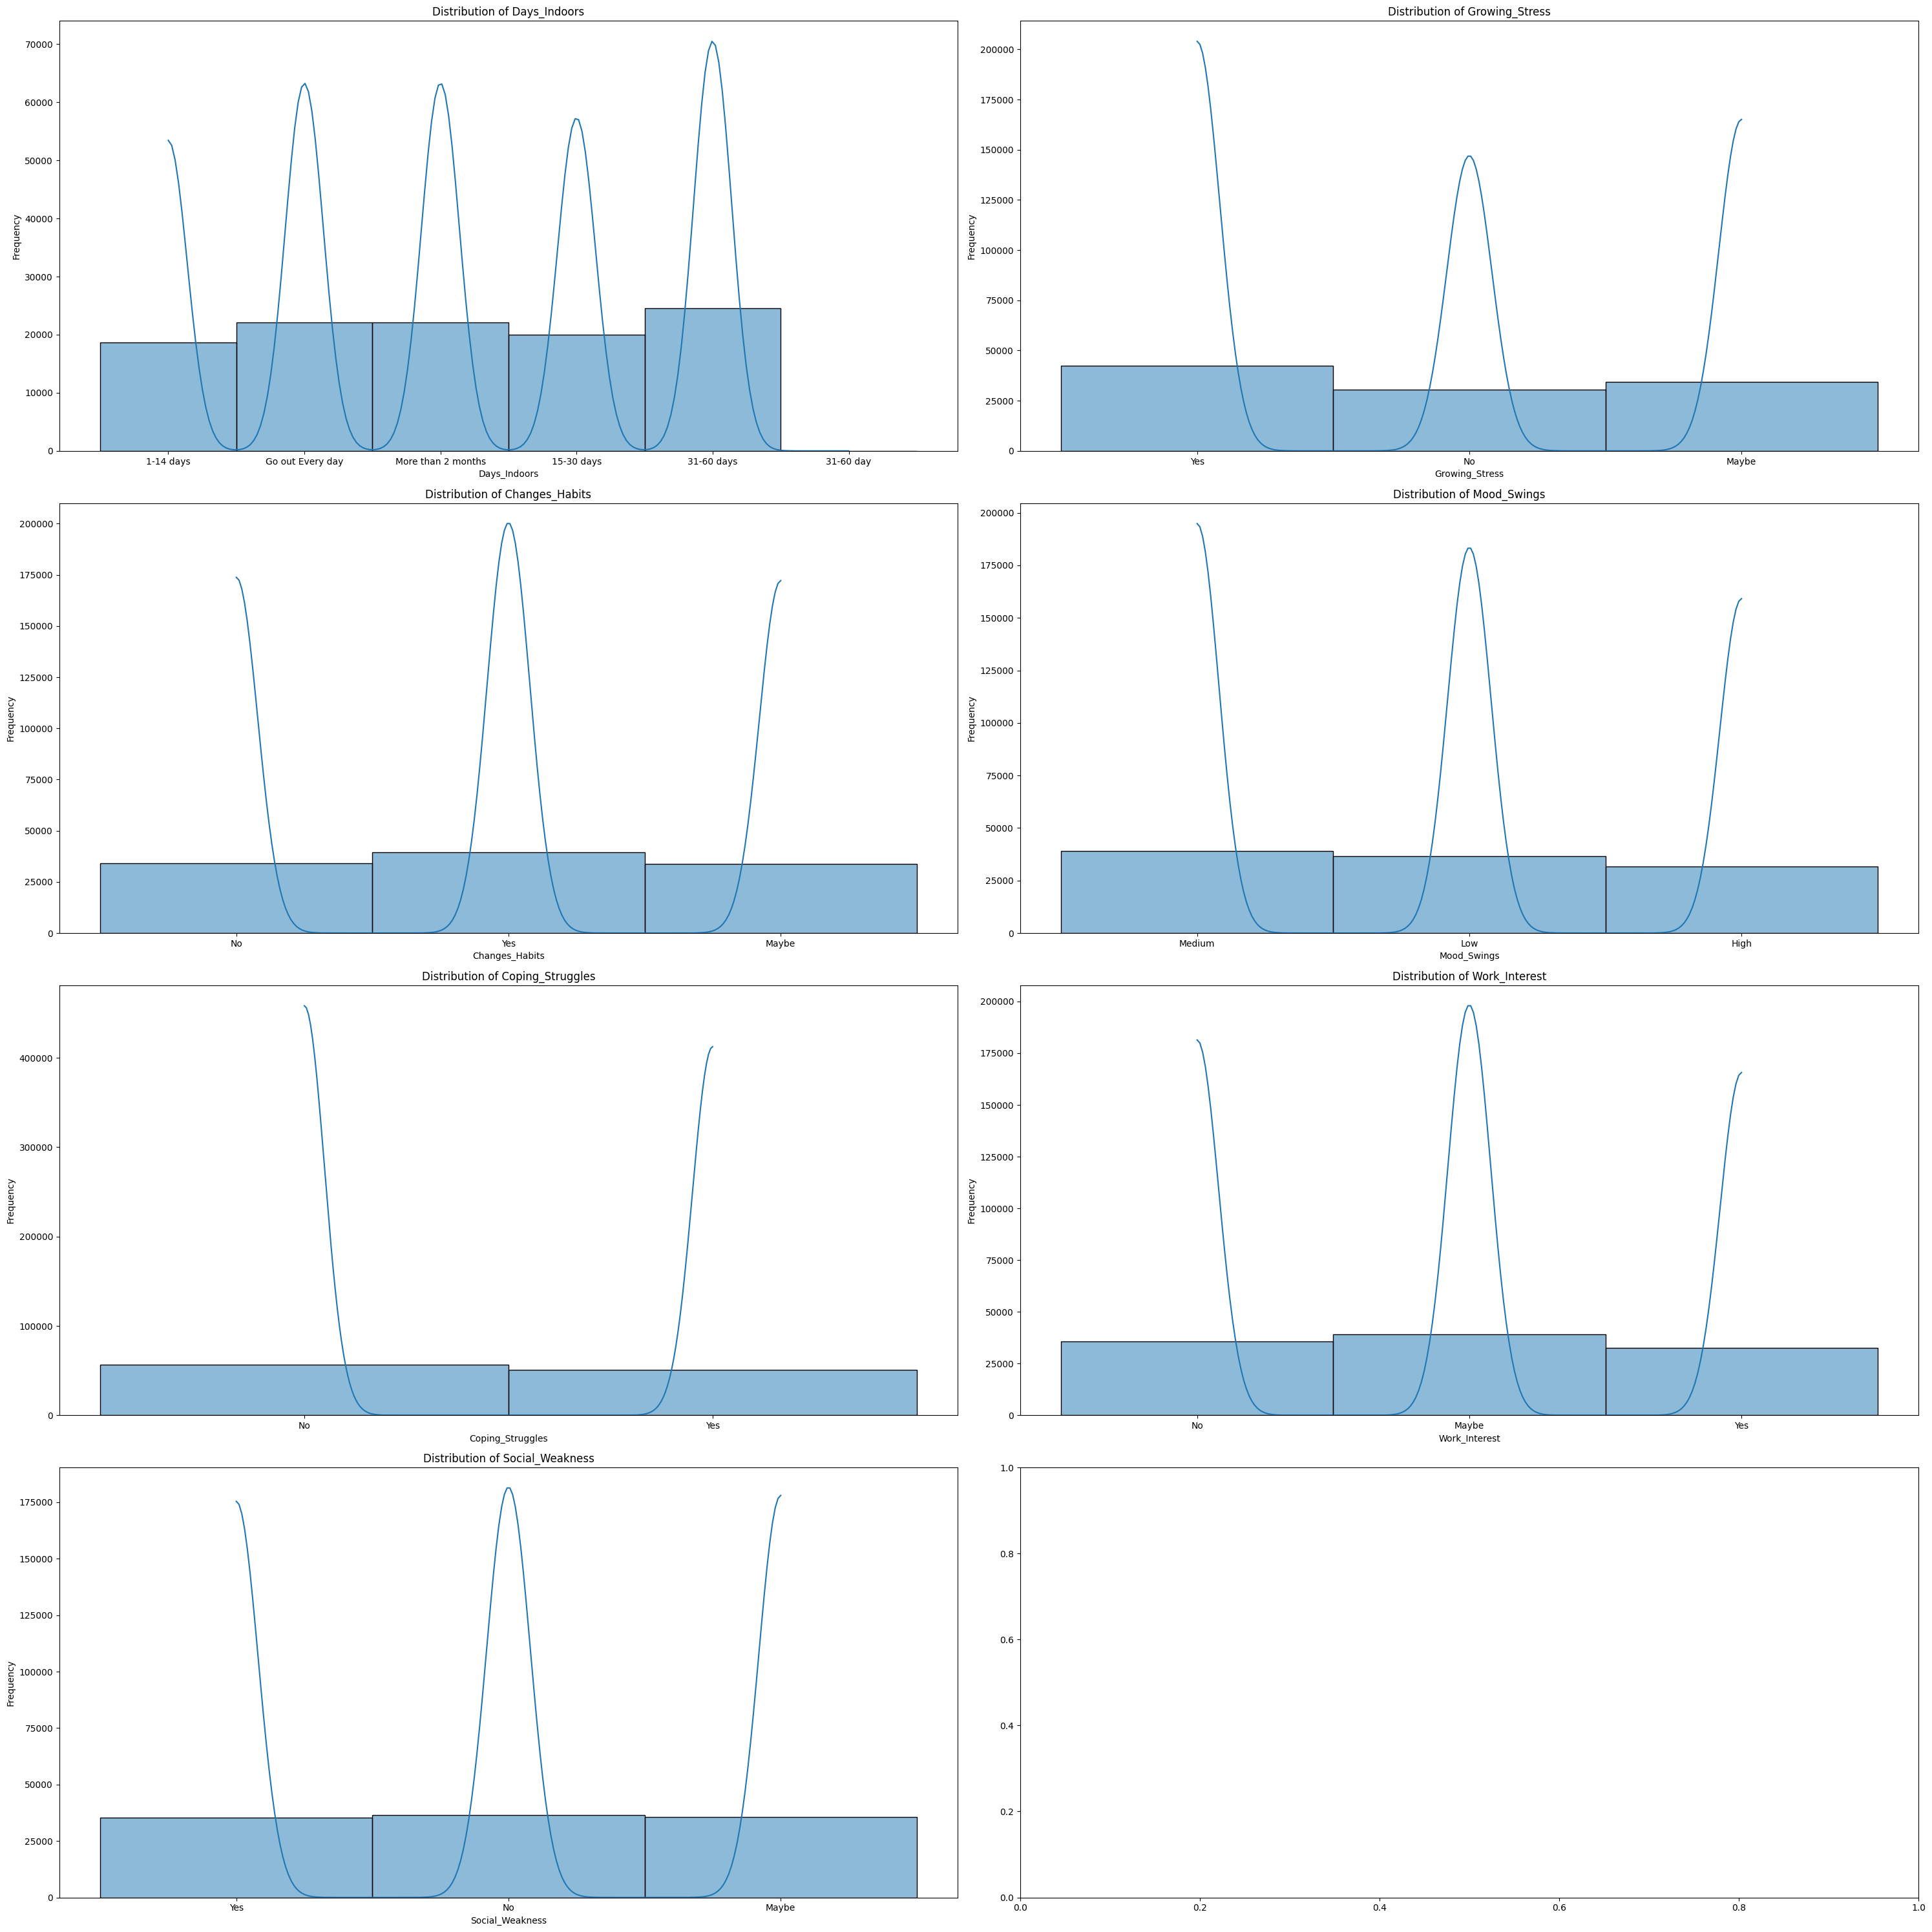

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(dataset[feature], bins=5, kde=True, ax=axes[i])  # Plot on subplot
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust

# **Summary of Numerical Features**

# ***Key Observations:***

1. ***Changes in Habits:*** Majority of respondents reported either "no" or "maybe" regarding changes in habits. This suggests that changes in habits might not be a prominent indicator or might be subjective and difficult to assess.

2. ***Days Indoors:*** Significant variation in the number of days spent indoors, with clusters around more than 2 months, 31-40 days, and 1-15 days. This indicates diverse patterns of indoor confinement among individuals reporting depression. Further investigation is needed to understand the factors contributing to these variations.

3. ***Work Interest and Mood Swings:*** Similar patterns observed, with a majority reporting either "no" or "maybe" for both work interest and mood swings. This suggests potential difficulties in assessing these aspects or a lack of clear-cut changes in these areas for a significant portion of the respondents.

4. ***Social Weakness***: Responses for social weakness were relatively balanced, with similar proportions of "yes," "no," and "maybe." This indicates that social weakness might be a more prevalent and recognizable symptom among individuals reporting depression, with varying degrees of severity.

<ipython-input-34-87031a925b54>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Growing_Stress_Numeric'] = dataset['Growing_Stress'].replace({'Yes': 1, 'No': 0, "Maybe":2})


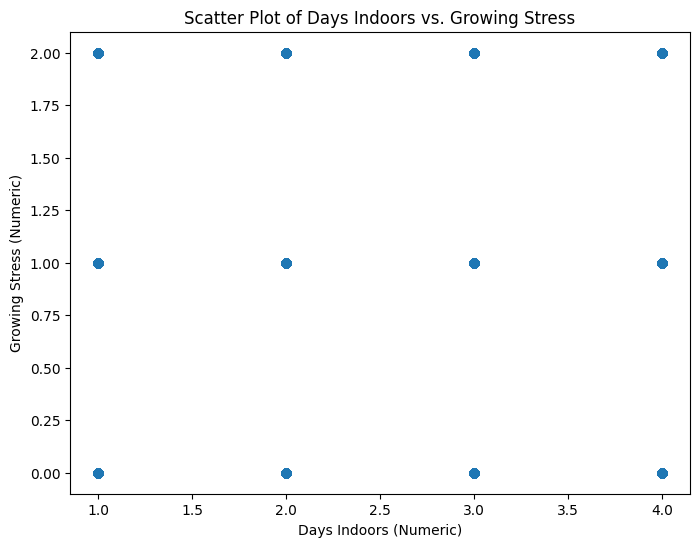

In [ ]:

# Create a dictionary to map categorical values to numerical values
days_indoor_mapping = {
    'Go out Every day': 1,  # Using the midpoint of the range
    '1-14 days': 1,  # Using the midpoint of the range
    '15-30 days': 2,
    '31-60 days': 3,
    'More than 2 months': 4,
    'NaN': float('nan')  # Keep NaN values as NaN
}
# Apply the mapping to the 'Days_Indoors' column
dataset['Days_Indoors_Numeric'] = dataset['Days_Indoors'].map(days_indoor_mapping)
# Convert 'Yes'/'No' values in 'Growing_Stress' to numerical values (1/0)
dataset['Growing_Stress_Numeric'] = dataset['Growing_Stress'].replace({'Yes': 1, 'No': 0, "Maybe":2})

# Extract the columns for the scatter plot
days_indoor_numeric = dataset['Days_Indoors_Numeric']
growing_stress_numeric = dataset['Growing_Stress_Numeric']

# Create the scatter plot using matplotlib
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(days_indoor_numeric, growing_stress_numeric)
plt.xlabel("Days Indoors (Numeric)")
plt.ylabel("Growing Stress (Numeric)")
plt.title("Scatter Plot of Days Indoors vs. Growing Stress")
plt.show()

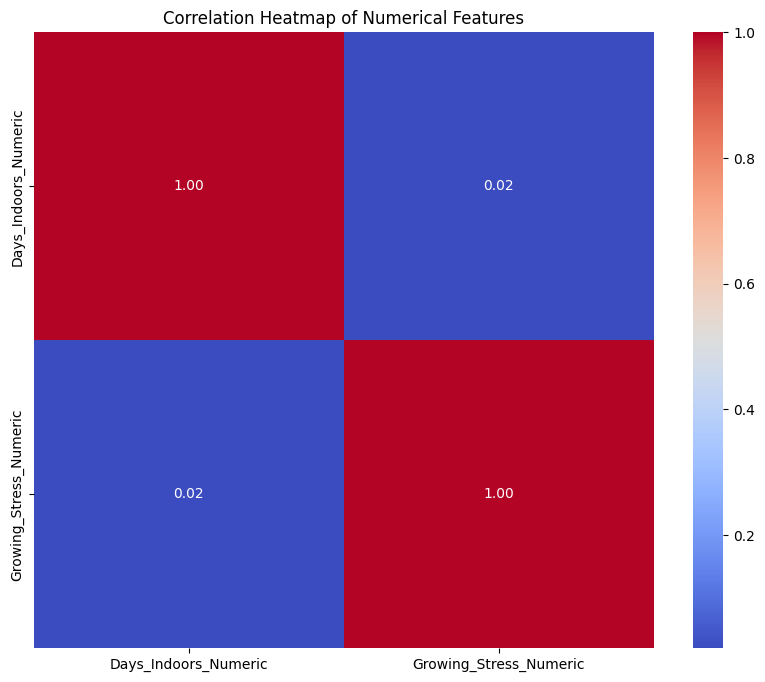

In [ ]:
numerical_features = ['Days_Indoors_Numeric', 'Growing_Stress_Numeric']

# Calculate the correlation matrix
correlation_matrix = dataset[numerical_features].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Days_Indoor Vs Growing_Stress**

# ***Key Observations:***

1. Weak relation , the value is closer to zero. means there is very weak impact of number of days indoor on Growing Stress

In [ ]:
dataset['Days_Indoors'].value_counts()

,count
Days_Indoors,
1-14 days,63548
31-60 days,60705
Go out Every day,58366
More than 2 months,55916
15-30 days,53829


In [ ]:
dataset['Days_Indoors'][dataset['Gender']=="Male"].value_counts()

,count
Days_Indoors,
1-14 days,53505
31-60 days,49815
Go out Every day,47355
More than 2 months,45510
15-30 days,43665


In [ ]:
dataset['Days_Indoors'][dataset['Gender']=="Female"].value_counts()

,count
Days_Indoors,
Go out Every day,11011
31-60 days,10890
More than 2 months,10406
15-30 days,10164
1-14 days,10043


<Figure size 800x600 with 0 Axes>

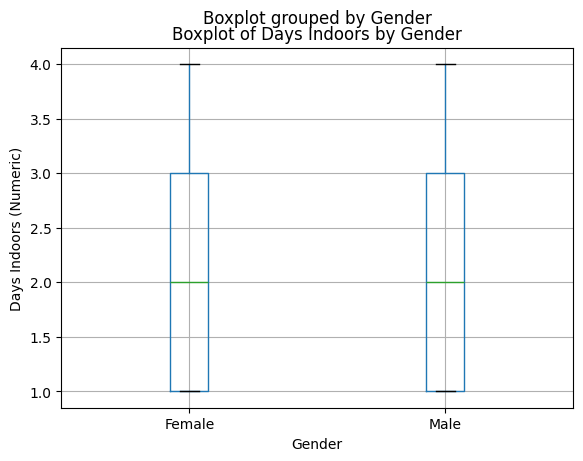

In [ ]:

plt.figure(figsize=(8, 6))
dataset.boxplot(column='Days_Indoors_Numeric', by='Gender')
plt.xlabel("Gender")
plt.ylabel("Days Indoors (Numeric)")
plt.title("Boxplot of Days Indoors by Gender")
plt.show()


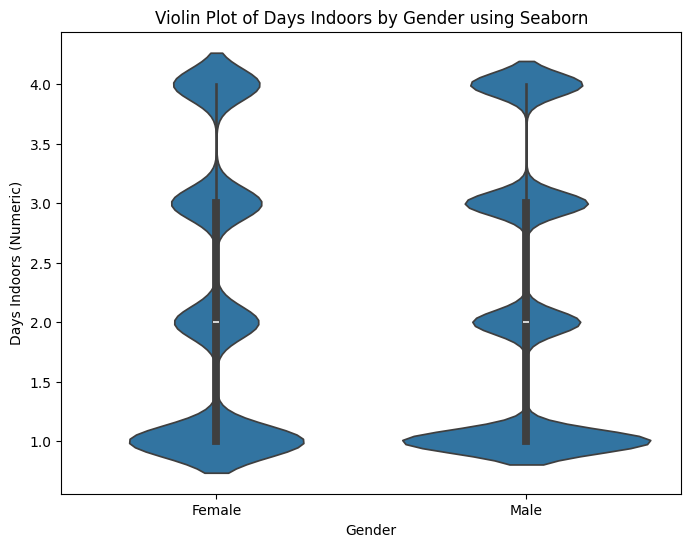

In [ ]:
# Violin plot using seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Days_Indoors_Numeric', data=dataset)
plt.xlabel("Gender")
plt.ylabel("Days Indoors (Numeric)")
plt.title("Violin Plot of Days Indoors by Gender using Seaborn")
plt.show()


# **Days_Indoors by Gender**

# **Key Observations:**

1. **Distribution of Days Indoors**: Males exhibit greater variability in the number of days spent indoors compared to females, suggesting a wider range of indoor confinement patterns among males. Females tend to show a more consistent distribution across different indoor durations.

2. **Prevalent Pattern**: Despite the difference in variability, both males and females predominantly report going out every day, indicating that outdoor activities remain a common practice for both genders.

family_history     No    Yes
self_employed               
No              51573  44644
Yes              3930   5091


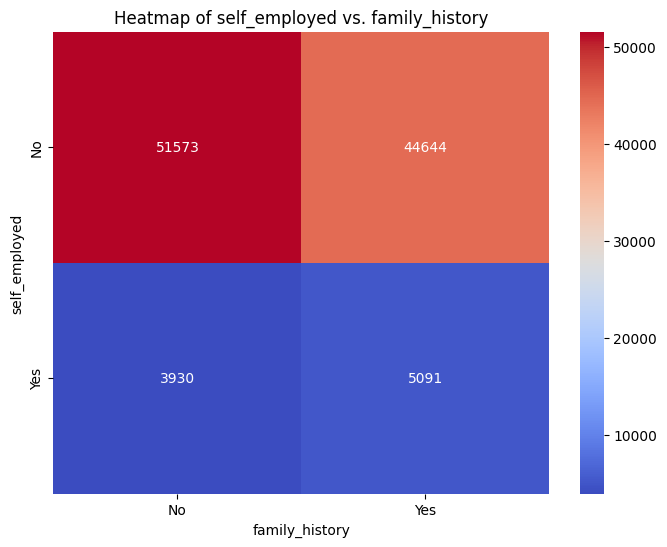

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(dataset['self_employed'], dataset['family_history'])
print(cross_tab)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")  # fmt="d" for integer values
plt.xlabel("family_history")
plt.ylabel("self_employed")
plt.title("Heatmap of self_employed vs. family_history")
plt.show()

# **self_employed vs. family_history**

# **Key Observations:**

1. **Majority**: Most individuals are not self-employed and have no family history of mental health issues.

2. **Positive** Association: There is a positive association between having a family history and not being self-employed.

3. **Least Frequent**: The least common combination is being self-employed with no family history.

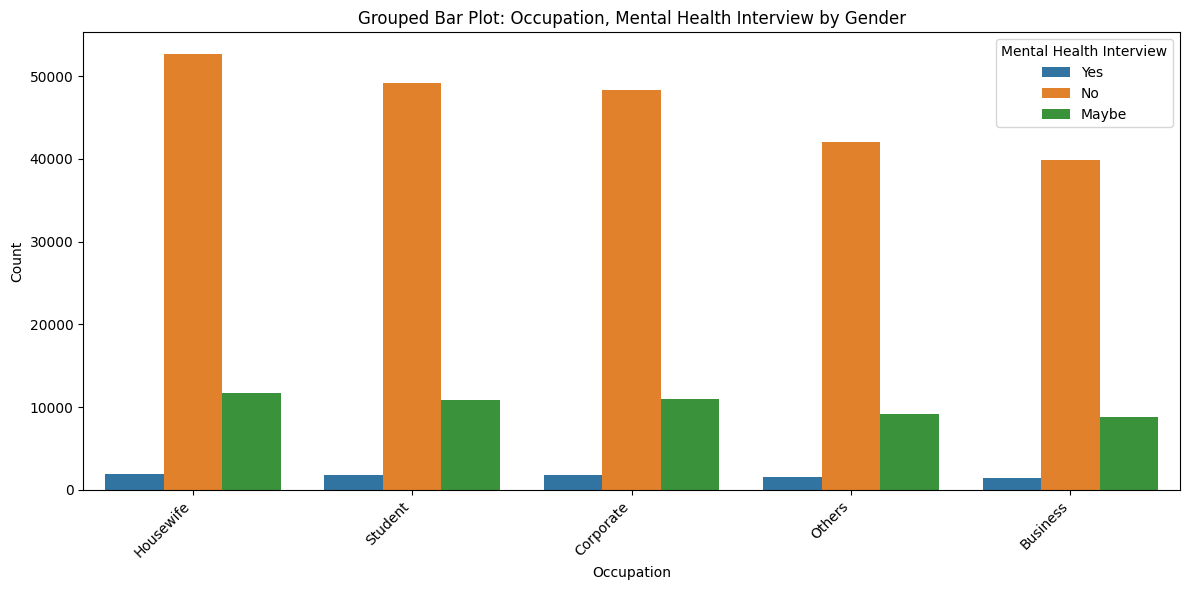

In [ ]:
# Create the grouped bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Occupation', hue='mental_health_interview', data=dataset, hue_order=['Yes', 'No', 'Maybe'], order=dataset['Occupation'].value_counts().index)
plt.title('Grouped Bar Plot: Occupation, Mental Health Interview by Gender')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Mental Health Interview')
plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
numerical_features = ['Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']
dataset[numerical_features].dtypes

,0
Days_Indoors,object
Growing_Stress,object
Changes_Habits,object
Mood_Swings,object
Coping_Struggles,object
Work_Interest,object
Social_Weakness,object


In [ ]:
numerical_features_values = dataset[numerical_features]

# Create a LabelEncoder instance
encoder = LabelEncoder()

for feature in numerical_features:
    # Fit and transform the data for each feature
    numerical_features_values[feature] = encoder.fit_transform(numerical_features_values[feature])

# Update the original dataset with the encoded values
dataset[numerical_features] = numerical_features_values


<ipython-input-69-1d83314d30ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_values[feature] = encoder.fit_transform(numerical_features_values[feature])
<ipython-input-69-1d83314d30ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_values[feature] = encoder.fit_transform(numerical_features_values[feature])
<ipython-input-69-1d83314d30ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,0,2,1,Yes,2,0,1,2,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,0,2,1,Yes,2,0,1,2,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,0,2,1,Yes,2,0,1,2,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,0,2,1,Yes,2,0,1,2,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,0,2,1,Yes,2,0,1,2,No,Yes


In [ ]:
numerical_features_values[numerical_features]

,Days_Indoors,Growing_Stress,Changes_Habits,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,0,2,1,2,0,1,2
1,0,2,1,2,0,1,2
2,0,2,1,2,0,1,2
3,0,2,1,2,0,1,2
4,0,2,1,2,0,1,2
...,...,...,...,...,...,...,...
292359,1,1,0,1,1,1,0
292360,1,1,0,1,1,1,0
292361,1,1,0,1,1,1,0
292362,1,1,0,1,1,1,0


3

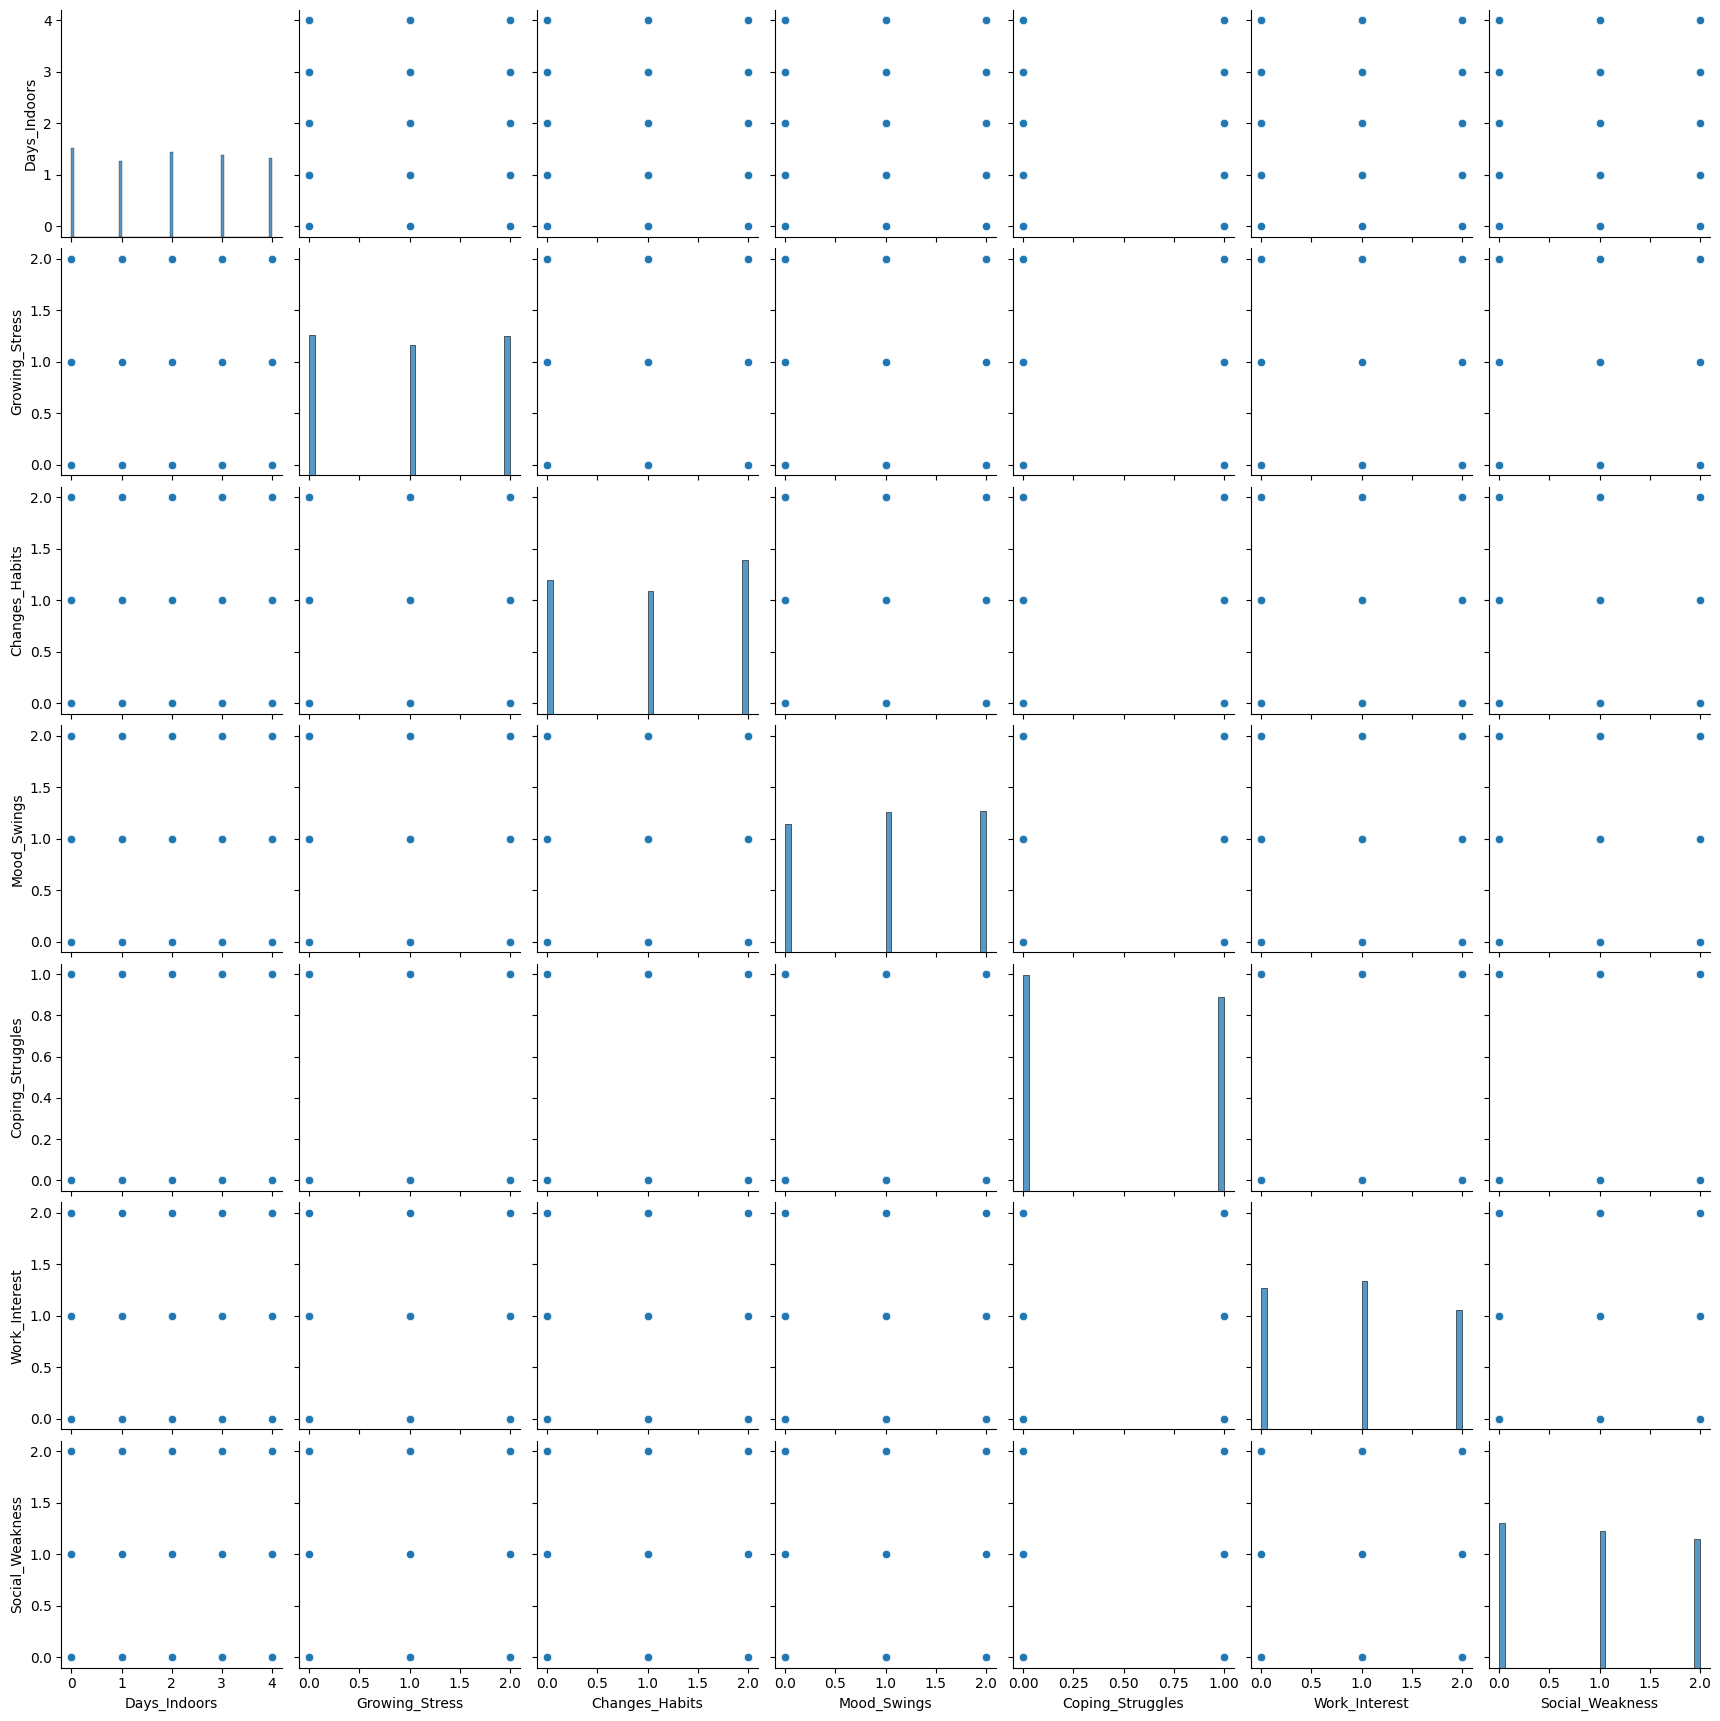

In [ ]:
sns.pairplot(numerical_features_values[numerical_features])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


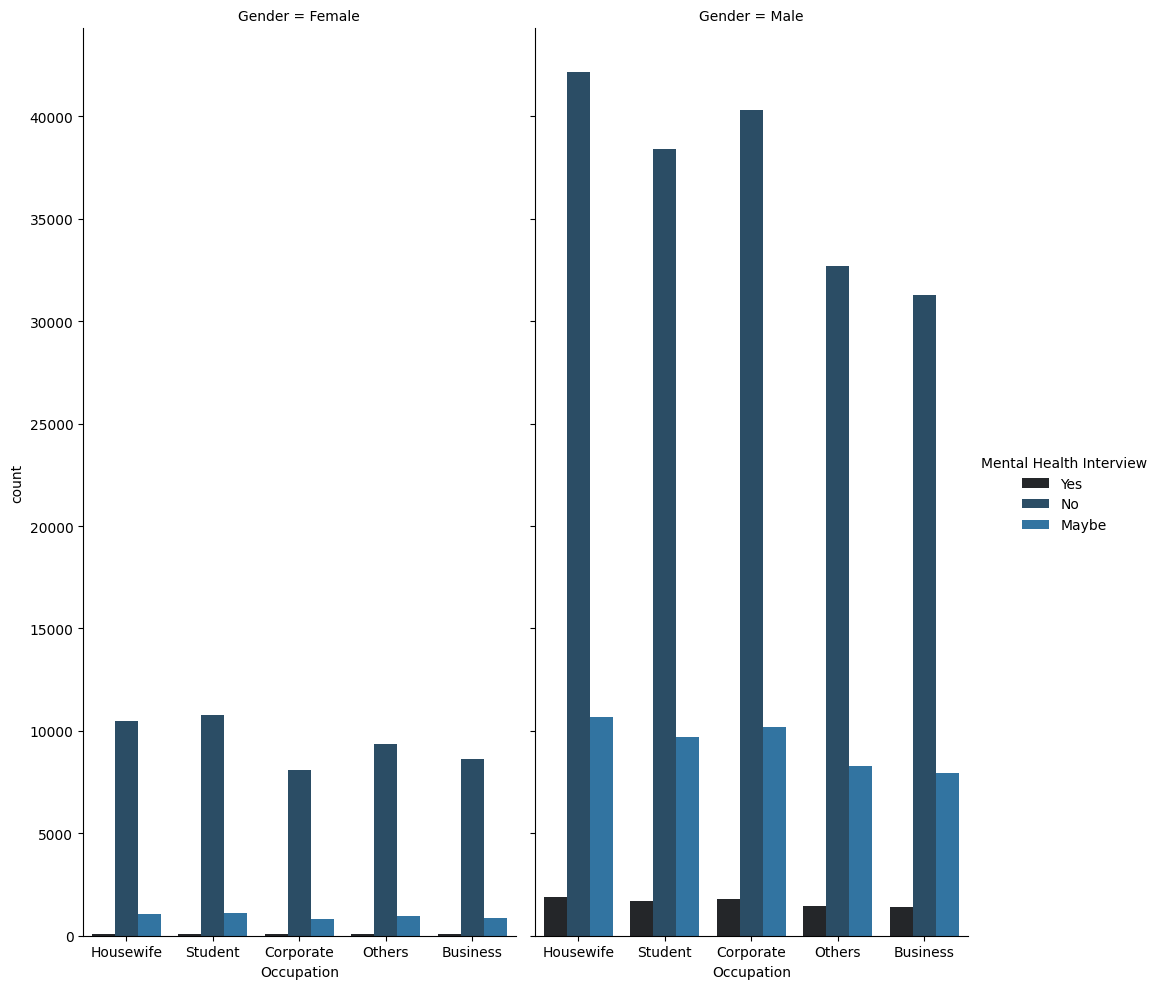

In [ ]:
# Create the grouped bar plot using FacetGrid
g = sns.FacetGrid(dataset, col="Gender", height=10, aspect=.5)
g.map(sns.countplot, "Occupation", hue='mental_health_interview', data=dataset, hue_order=['Yes', 'No', 'Maybe'], order=dataset['Occupation'].value_counts().index)
g.add_legend(title='Mental Health Interview')
plt.show()

# **Relationships Analysis Among Multiple Variables**

# **Key Observations:**

1. **Mental Health Interview Disparity**: Females have significantly lower rates of mental health interviews compared to males.

2. **Prevalent Trend**: The majority of individuals, regardless of gender, have not undergone a mental health interview.

mental_health_interview  Maybe      No   Yes     All
family_history                                      
No                       33760  136788  6284  176832
Yes                      17814   95378  2340  115532
All                      51574  232166  8624  292364


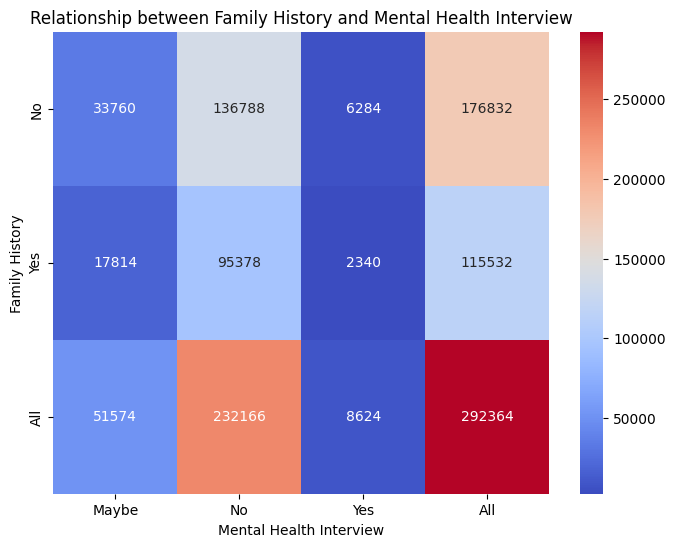

treatment           No     Yes     All
family_history                        
No              113766   63066  176832
Yes              30992   84540  115532
All             144758  147606  292364


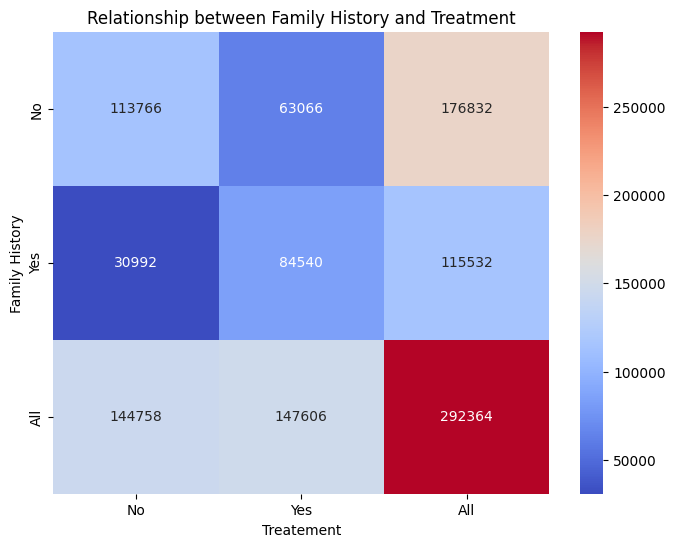

mental_health_interview  Maybe      No   Yes     All
treatment                                           
No                       30986  109828  3944  144758
Yes                      20588  122338  4680  147606
All                      51574  232166  8624  292364


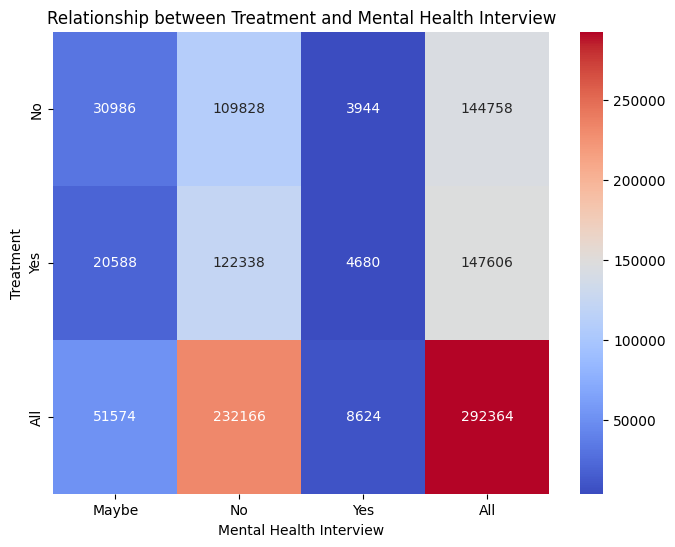

In [ ]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(dataset['family_history'], dataset['mental_health_interview'], margins=True)

# Display the cross-tabulation table
print(cross_tab)

# Create a heatmap to visualize the relationships
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.xlabel("Mental Health Interview")
plt.ylabel("Family History")
plt.title("Relationship between Family History and Mental Health Interview")
plt.show()



# Create a cross-tabulation table
cross_tab = pd.crosstab(dataset['family_history'], dataset['treatment'], margins=True)

# Display the cross-tabulation table
print(cross_tab)

# Create a heatmap to visualize the relationships
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.xlabel("Treatement")
plt.ylabel("Family History")
plt.title("Relationship between Family History and Treatment")
plt.show()


# Create a cross-tabulation table
cross_tab = pd.crosstab(dataset['treatment'], dataset['mental_health_interview'], margins=True)

# Display the cross-tabulation table
print(cross_tab)

# Create a heatmap to visualize the relationships
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d")
plt.xlabel("Mental Health Interview")
plt.ylabel("Treatment")
plt.title("Relationship between Treatment and Mental Health Interview")
plt.show()




In [ ]:
# Restoring Dataset to Original Again

dataset=original_ds

,Work_Interest
0,1
1,1
2,1
3,1
4,1
...,...
292359,1
292360,1
292361,1
292362,1


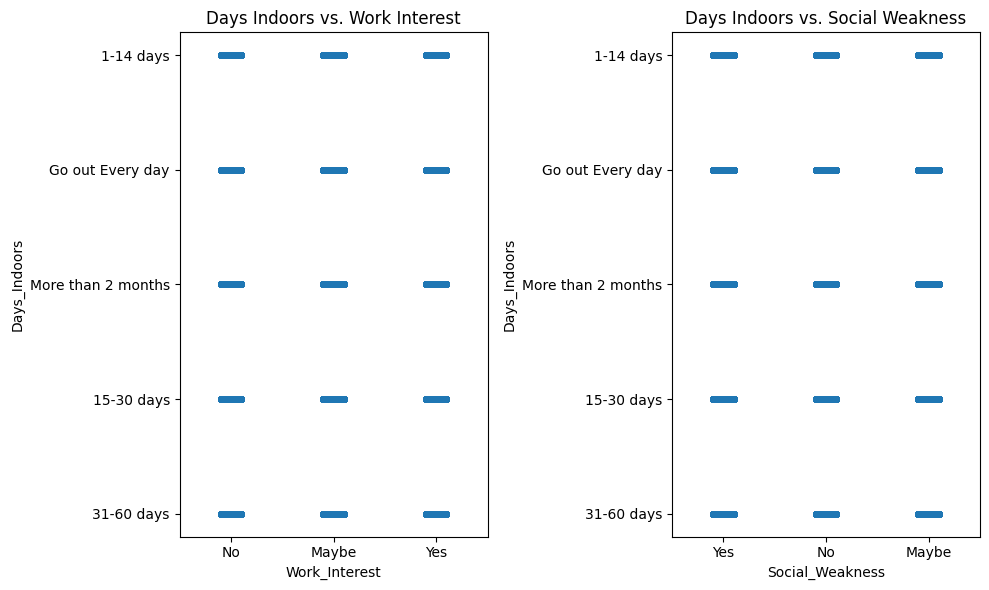

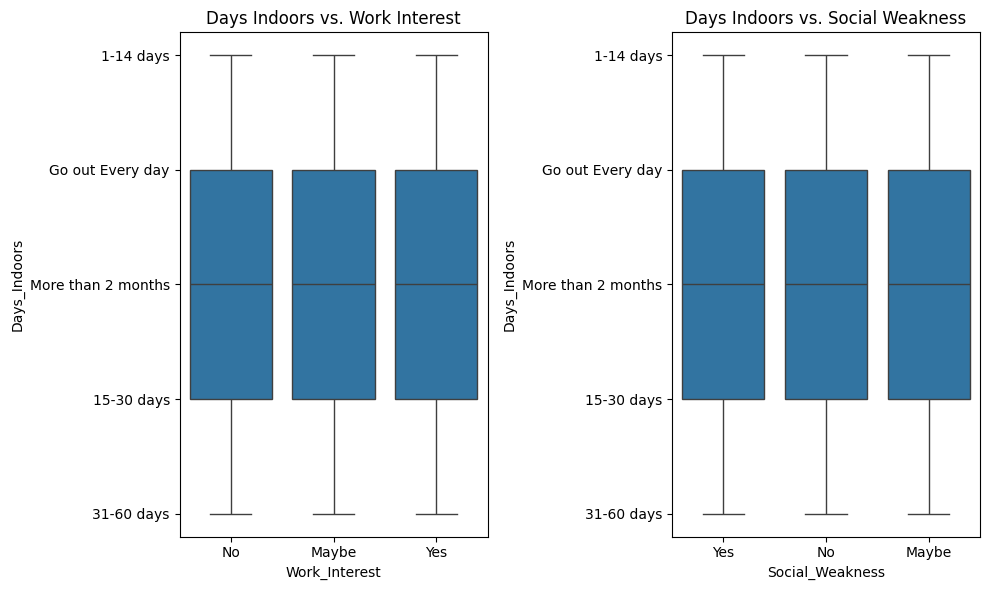

In [ ]:

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.stripplot(x='Work_Interest', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Work Interest")

plt.subplot(1, 2, 2)
sns.stripplot(x='Social_Weakness', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Social Weakness")

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

# Subplot 1: Days_Indoors vs. Work_Interest
plt.subplot(1, 2, 1)
sns.boxplot(x='Work_Interest', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Work Interest")

# Subplot 2: Days_Indoors vs. Social_Weakness
plt.subplot(1, 2, 2)
sns.boxplot(x='Social_Weakness', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Social Weakness")

plt.tight_layout()
plt.show()

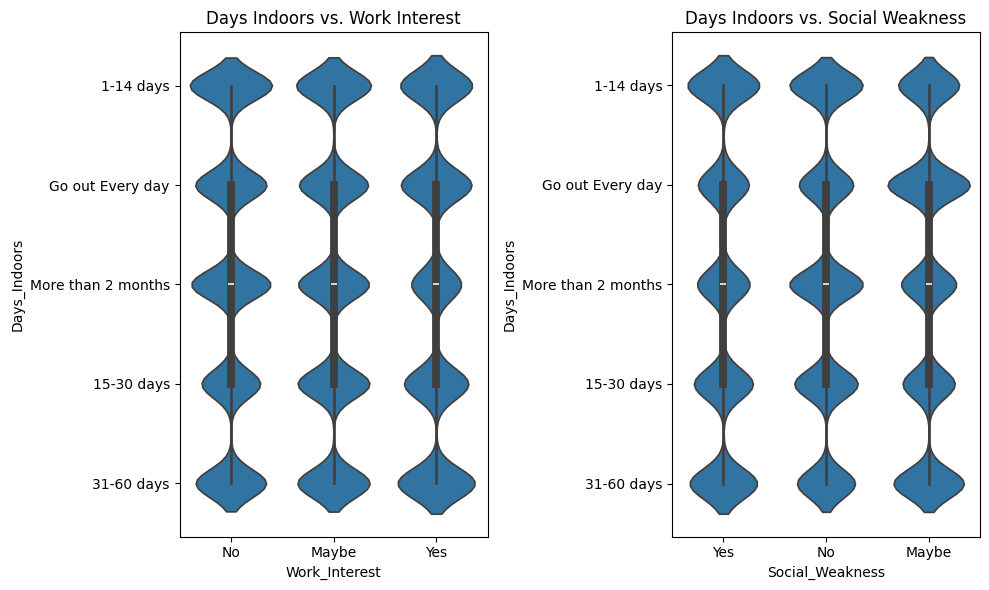

In [ ]:
plt.figure(figsize=(10, 6))

# Subplot 1: Days_Indoors vs. Work_Interest
plt.subplot(1, 2, 1)
sns.violinplot(x='Work_Interest', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Work Interest")

# Subplot 2: Days_Indoors vs. Social_Weakness
plt.subplot(1, 2, 2)
sns.violinplot(x='Social_Weakness', y='Days_Indoors', data=dataset)
plt.title("Days Indoors vs. Social Weakness")

plt.tight_layout()
plt.show()

# **Study the impact of Days_Indoors on Work_Interest or Social_Weakness.**

# **Key Observations:**

1.**More than 2 Months**: Individuals spending more than 2 months indoors show a potential association with changes in work interest and increased social weakness.

2. **1-14 Days**: Limited impact of spending 1-14 days indoors on work interest and social weakness, as suggested by the similar distributions in the violin plot.

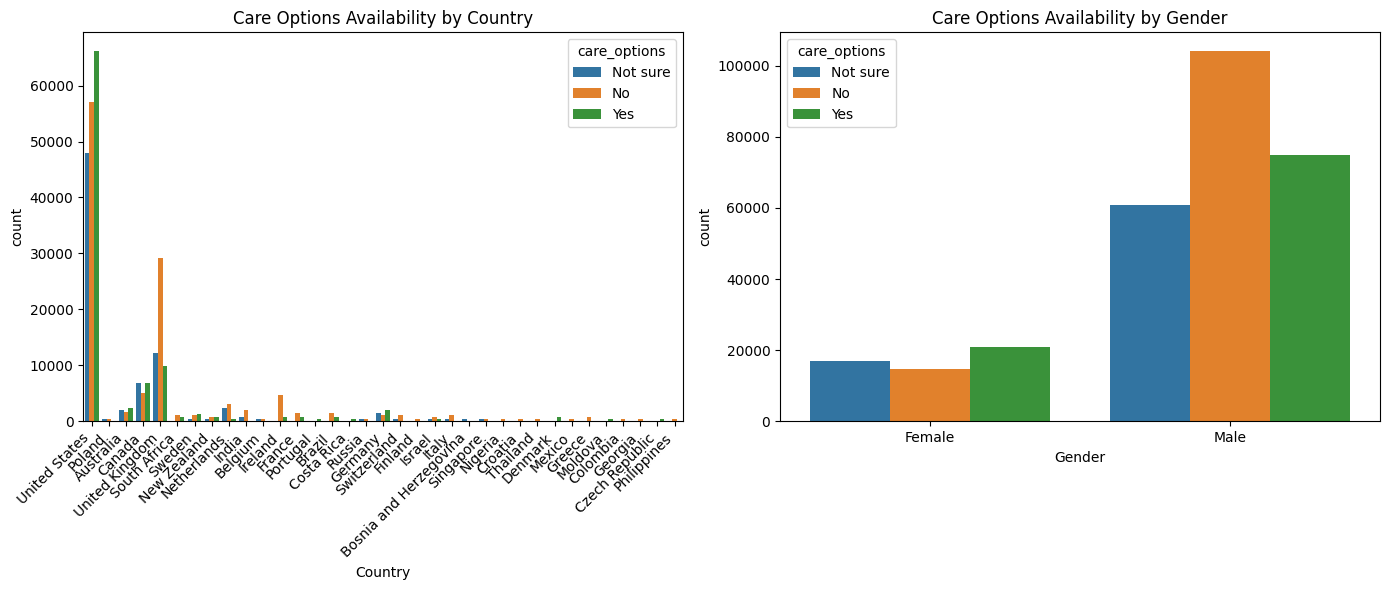

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Country', hue='care_options', data=dataset)
plt.title("Care Options Availability by Country")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='care_options', data=dataset)
plt.title("Care Options Availability by Gender")

plt.tight_layout()
plt.show()

# **Assess how care_options availability varies by Country or Gender.**

# **Key Observations:**

1. **Country**: The United States exhibits a higher prevalence of available care options compared to the United Kingdom. Other countries show varying levels of care options availability.

2. **Gender**: While females demonstrate a greater proportion of "Yes" responses for care options, males overall have a larger number of care options available. Notably, males also have a higher proportion of "No" responses, indicating potential disparities in access to care.

# Task 2

Restoring Dataset to original

In [ ]:
dataset=original_ds
dataset.drop(columns=['Timestamp'], inplace=True)
dataset.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
# Processing Dataset

imputer = SimpleImputer(strategy='most_frequent')

# Handle categorical columns using one-hot encoding and numerical columns with imputation
categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history','treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
numerical_columns = []

# Define the transformer for categorical columns (OneHotEncoder + Imputer)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])


In [ ]:
# Function to evaluate models based on the metrics
def evaluate_classification_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred, average="weighted")}')
    print(f'Recall: {recall_score(y_true, y_pred, average="weighted")}')
    print(f'F1-Score: {f1_score(y_true, y_pred, average="weighted")}')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))

def evaluate_regression_model(y_true, y_pred):
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred)}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred)}')
    print(f'R-squared (R²): {r2_score(y_true, y_pred)}')

In [ ]:
# 1. Predicting Mental Health Treatment (Target: 'treatment')
def predict_mental_health_treatment():
    encoder = LabelEncoder()
    dataset['treatment'] = encoder.fit_transform(dataset['treatment'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])


    # Split the data
    X = dataset.drop(columns=['treatment'])
    y = dataset['treatment']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Mental Health Treatment Prediction:')
    evaluate_classification_model(y_test, y_pred)

# 2. Predicting Days Spent Indoors (Target: 'Days_Indoors')
def predict_days_indoors():
    # Encoding Days_Indoors as numerical
    days_encoder = LabelEncoder()
    dataset['Days_Indoors'] = days_encoder.fit_transform(dataset['Days_Indoors'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history','treatment', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])


    # Split the data
    X = dataset.drop(columns=['Days_Indoors'])
    y = dataset['Days_Indoors']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestRegressor (since Days_Indoors is continuous)
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Days Spent Indoors Prediction:')
    evaluate_regression_model(y_test, y_pred)

# 3. Predicting Stress Levels (Target: 'Growing_Stress')
def predict_stress_levels():
    encoder = LabelEncoder()
    dataset['Growing_Stress'] = encoder.fit_transform(dataset['Growing_Stress'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment','Days_Indoors', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])

    # Split the data
    X = dataset.drop(columns=['Growing_Stress'])
    y = dataset['Growing_Stress']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Stress Level Prediction:')
    evaluate_classification_model(y_test, y_pred)

# 4. Predicting Changes in Habits (Target: 'Changes_Habits')
def predict_changes_in_habits():
    encoder = LabelEncoder()
    dataset['Changes_Habits'] = encoder.fit_transform(dataset['Changes_Habits'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history','treatment', 'Days_Indoors', 'Growing_Stress', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])

    # Split the data
    X = dataset.drop(columns=['Changes_Habits'])
    y = dataset['Changes_Habits']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Changes in Habits Prediction:')
    evaluate_classification_model(y_test, y_pred)

# 5. Predicting Work Interest (Target: 'Work_Interest')
def predict_work_interest():
    encoder = LabelEncoder()
    dataset['Work_Interest'] = encoder.fit_transform(dataset['Work_Interest'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history','treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Social_Weakness', 'mental_health_interview', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])

    # Split the data
    X = dataset.drop(columns=['Work_Interest'])
    y = dataset['Work_Interest']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Work Interest Prediction:')
    evaluate_classification_model(y_test, y_pred)

# 6. Predicting Likelihood of Mental Health Issues (Target: 'Mental_Health_History')
def predict_mental_health_history():
    encoder = LabelEncoder()
    dataset['Mental_Health_History'] = encoder.fit_transform(dataset['Mental_Health_History'])

    categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history','treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'care_options']
    # Define the transformer for categorical columns (OneHotEncoder + Imputer)
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])

    # Split the data
    X = dataset.drop(columns=['Mental_Health_History'])
    y = dataset['Mental_Health_History']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model Pipeline for RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print('Mental Health History Prediction:')
    evaluate_classification_model(y_test, y_pred)

In [ ]:
# Call each prediction function
predict_mental_health_treatment()
predict_days_indoors()
predict_stress_levels()
predict_changes_in_habits()
predict_work_interest()
predict_mental_health_history()

Mental Health Treatment Prediction:
Accuracy: 0.7597993387299053
Precision: 0.7602106888191003
Recall: 0.7597993387299053
F1-Score: 0.7596478159029807
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     43529
           1       0.75      0.78      0.77     44181

    accuracy                           0.76     87710
   macro avg       0.76      0.76      0.76     87710
weighted avg       0.76      0.76      0.76     87710

Days Spent Indoors Prediction:
Mean Absolute Error (MAE): 0.035651579067381145
Mean Squared Error (MSE): 0.06757496294607228
R-squared (R²): 0.9664894570224765
Stress Level Prediction:
Accuracy: 0.9888724204765705
Precision: 0.9888808856312774
Recall: 0.9888724204765705
F1-Score: 0.9888750671053902
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29954
           1       0.99      0.99      0.99     27818
           2 

ValueError: A given column is not a column of the dataframe